# Statistics Dataset
### In this dataset im going to perfom some  statistics, like:
* Descriptive statistics
    * Mean
    * Median
    * Rango
    * STD
    * Variance

In [1]:
import pandas as pd

data=pd.read_csv('Crime_R.csv')
#lets visualize the first values
print(data.columns)
#shape of the dataframe
print("This dataframe has",data.shape[0],"columns and", data.shape[1],"rows.")


Index(['CrimeRate', 'Youth', 'Southern', 'Education', 'ExpenditureYear0',
       'LabourForce', 'Males', 'MoreMales', 'StateSize', 'YouthUnemployment',
       'MatureUnemployment', 'HighYouthUnemploy', 'Wage', 'BelowWage',
       'CrimeRate10', 'Youth10', 'Education10', 'ExpenditureYear10',
       'LabourForce10', 'Males10', 'MoreMales10', 'StateSize10',
       'YouthUnemploy10', 'MatureUnemploy10', 'HighYouthUnemploy10', 'Wage10',
       'BelowWage10'],
      dtype='object')
This dataframe has 47 columns and 27 rows.


## Descriptive Statistics

In [2]:
print(data.describe())

        CrimeRate       Youth   Southern  Education  ExpenditureYear0  \
count   47.000000   47.000000  47.000000  47.000000         47.000000   
mean   102.808511  138.574468   0.340426  12.391489         85.000000   
std     28.893266   12.567634   0.478975   1.120332         29.718974   
min     45.500000  119.000000   0.000000  10.000000         45.000000   
25%     82.700000  130.000000   0.000000  11.550000         62.500000   
50%    103.000000  136.000000   0.000000  12.400000         78.000000   
75%    120.650000  146.000000   1.000000  13.200000        104.500000   
max    161.800000  177.000000   1.000000  15.100000        166.000000   

       LabourForce        Males  MoreMales   StateSize  YouthUnemployment  \
count    47.000000    47.000000  47.000000   47.000000          47.000000   
mean    561.191489   983.021277   0.191489   36.617021          95.468085   
std      40.411814    29.467365   0.397727   38.071188          18.028783   
min     480.000000   934.000000   

In [3]:
data.var()

CrimeRate               834.820796
Youth                   157.945421
Southern                  0.229417
Education                 1.255143
ExpenditureYear0        883.217391
LabourForce            1633.114709
Males                   868.325624
MoreMales                 0.158187
StateSize              1449.415356
YouthUnemployment       325.037003
MatureUnemployment       71.325624
HighYouthUnemploy         0.222017
Wage                   9310.502313
BelowWage              1591.695652
CrimeRate10            1542.766920
Youth10                 119.123959
Education10               1.371952
ExpenditureYear10       781.835338
LabourForce10          1417.167438
Males10                 890.765957
MoreMales10               0.171138
StateSize10            1559.518039
YouthUnemploy10         318.382979
MatureUnemploy10         70.801110
HighYouthUnemploy10       0.246068
Wage10                 8789.018501
BelowWage10            1502.041628
dtype: float64

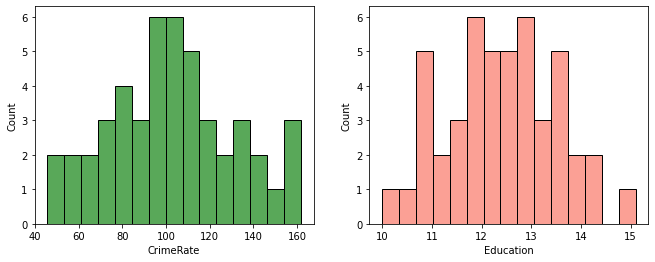

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(11, 4))
sns.histplot(data=data, x='CrimeRate',bins=15, color='forestgreen',ax=axes[0])
sns.histplot(data=data, x='Education',bins=15, color='salmon',ax=axes[1])
plt.show()

[]

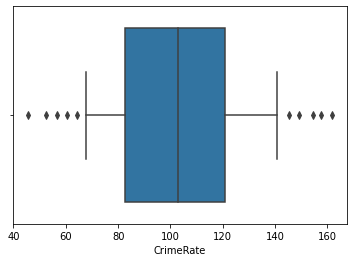

In [5]:
sns.boxplot(data=data, x='CrimeRate', whis=[10,90] )
plt.plot()

In [6]:
# calculate the probability of cancer patient and diagnostic test

# calculate P(A|B) given P(A), P(B|A), P(B|not A)
def bayes_theorem(p_a, p_b_given_a, p_b_given_not_a):
	# calculate P(not A)
	not_a = 1 - p_a
	# calculate P(B)
	p_b = p_b_given_a * p_a + p_b_given_not_a * not_a
	# calculate P(A|B)
	p_a_given_b = (p_b_given_a * p_a) / p_b
	return p_a_given_b

# P(A)
p_a = 0.0002
# P(B|A)
p_b_given_a = 0.85
# P(B|not A)
p_b_given_not_a = 0.05
# calculate P(A|B)
result = bayes_theorem(p_a, p_b_given_a, p_b_given_not_a)
# summarize
print('P(A|B) = %.3f%%' % (result * 100))

P(A|B) = 0.339%


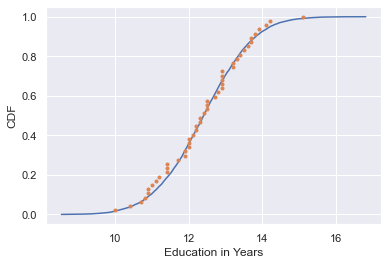

In [7]:
import numpy as np

data_ed=data['Education']    
mean=np.mean(data_ed)
std=np.std(data_ed)                                  #steps to create the normal data
samples=np.random.normal(mean, std, size=10000)

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y

x, y =ecdf(data_ed)
x_norm, y_norm=ecdf(samples)

sns.set()
plt.plot(x_norm,y_norm)
plt.plot(x,y,marker='.', linestyle='none')
plt.xlabel('Education in Years')
plt.ylabel('CDF')
plt.show()


In [8]:
from scipy.stats import skew
sk1=[1,1,1,2,4,1,1,1,1,1,1,1,1,2,3,4,2,3,9,8,9]    #more lower values
sk2=[1,2,1,1,9,8,9,8,7,8,9,8,7,14,9,9,8,9,7,9] #more higher values
print('The coefficients of skewness are ',skew(sk1),'(lower values) and', skew(sk2), '(higher values)')

The coefficients of skewness are  1.5657272468749186 (lower values) and -0.6625965684897368 (higher values)


In [9]:
data1=pd.read_csv('Diet_R.csv')
data1.rename(columns={'pre.weight':'preweight'},inplace=True)
print(data1.dtypes)

Person            int64
gender           object
Age               int64
Height            int64
preweight         int64
Diet              int64
weight6weeks    float64
dtype: object


In [10]:
import statsmodels.api as sm 
from statsmodels.formula.api import ols

model=ols('preweight~gender', data=data1).fit()
anova1way= sm.stats.anova_lm(model, type=2)
print(anova1way)

            df       sum_sq      mean_sq          F        PR(>F)
gender     2.0  2815.560416  1407.780208  34.687053  2.157487e-11
Residual  75.0  3043.888302    40.585177        NaN           NaN


In [11]:
import statsmodels.api as sm 
from statsmodels.formula.api import ols

model2=ols('preweight~gender+Diet+gender*Diet', data=data1).fit()
anova2way= sm.stats.anova_lm(model2, type=2)
print(anova2way)
print(data1.corr())

               df       sum_sq      mean_sq          F        PR(>F)
gender        2.0  2815.560416  1407.780208  33.807387  4.056530e-11
Diet          1.0     3.757281     3.757281   0.090230  7.647389e-01
gender:Diet   2.0   981.101229   490.550615  11.780414  3.681700e-05
Residual     73.0  3039.807739    41.641202        NaN           NaN
                Person       Age    Height  preweight      Diet  weight6weeks
Person        1.000000 -0.101773 -0.033696   0.296399  0.942237      0.196728
Age          -0.101773  1.000000  0.080393  -0.006265 -0.127707      0.010472
Height       -0.033696  0.080393  1.000000   0.154381 -0.118241      0.183998
preweight     0.296399 -0.006265  0.154381   1.000000  0.039234      0.958449
Diet          0.942237 -0.127707 -0.118241   0.039234  1.000000     -0.048050
weight6weeks  0.196728  0.010472  0.183998   0.958449 -0.048050      1.000000


In [12]:
# Example of the Shapiro-Wilk Normality Test for a sample of weights
from scipy.stats import shapiro
data2 = data1.preweight
stat, p = shapiro(data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.969, p=0.055
Probably Gaussian


In [13]:
# Example of the D'Agostino's K^2 Normality Test
from scipy.stats import normaltest
data2 = data1.preweight
stat, p = normaltest(data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=4.843, p=0.089
Probably Gaussian


In [14]:
# Example of the Anderson-Darling Normality Test
from scipy.stats import anderson
data2 = data1.preweight
result = anderson(data2)
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < cv:
		print('Probably Gaussian at the %.1f%% level' % (sl))
	else:
		print('Probably not Gaussian at the %.1f%% level' % (sl))

stat=0.369
Probably Gaussian at the 15.0% level
Probably Gaussian at the 10.0% level
Probably Gaussian at the 5.0% level
Probably Gaussian at the 2.5% level
Probably Gaussian at the 1.0% level


In [15]:
# Example of the Pearson's Correlation test
from scipy.stats import pearsonr
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.688, p=0.028
Probably dependent


In [16]:
# Example of the Spearman's Rank Correlation Test
from scipy.stats import spearmanr
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = spearmanr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.855, p=0.002
Probably dependent


In [17]:
# Example of the Kendall's Rank Correlation Test
from scipy.stats import kendalltau
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = kendalltau(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.733, p=0.002
Probably dependent


In [18]:
import scipy.stats as stats

# create sample data according to survey
data = [['18-29', 'Conservative'] for i in range(141)] + \
        [['18-29', 'Socialist'] for i in range(68)] + \
        [['18-29', 'Other'] for i in range(4)] + \
        [['30-44', 'Conservative'] for i in range(179)] + \
        [['30-44', 'Socialist'] for i in range(159)] + \
        [['30-44', 'Other'] for i in range(7)] + \
        [['45-65', 'Conservative'] for i in range(220)] + \
        [['45-65', 'Socialist'] for i in range(216)] + \
        [['45-65', 'Other'] for i in range(4)] + \
        [['65 & older', 'Conservative'] for i in range(86)] + \
        [['65 & older', 'Socialist'] for i in range(101)] + \
        [['65 & older', 'Other'] for i in range(4)]
df = pd.DataFrame(data, columns = ['Age Group', 'Political Affiliation']) 

# create contingency table
data_crosstab = pd.crosstab(df['Age Group'],
                            df['Political Affiliation'],
                           margins=True, margins_name="Total")

# significance level
alpha = 0.05

# Calcualtion of Chisquare test statistics
chi_square = 0
rows = df['Age Group'].unique()
columns = df['Political Affiliation'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.norm.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)
    
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", critical_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 24.367421717305202  and p value is: 0.0
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 24.367421717305202  and p value is: 12.591587243743977
Null Hypothesis is rejected.


In [19]:
# Example of the Augmented Dickey-Fuller unit root test
from statsmodels.tsa.stattools import adfuller
data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
stat, p, lags, obs, crit, t = adfuller(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably not Stationary')
else:
	print('Probably Stationary')

stat=0.517, p=0.985
Probably not Stationary


In [20]:
# Example of the Kwiatkowski-Phillips-Schmidt-Shin test
from statsmodels.tsa.stattools import kpss
data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
stat, p, lags, crit = kpss(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably not Stationary')
else:
	print('Probably Stationary')

stat=0.410, p=0.073
Probably not Stationary


C:\Users\56945\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


In [21]:
# Example of the Student's t-test
from scipy.stats import ttest_ind
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = ttest_ind(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=-0.326, p=0.748
Probably the same distribution


stat=40.000, p=0.473
Probably the same distribution


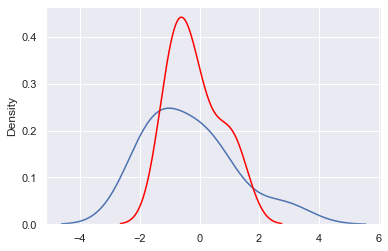

In [22]:
# Example of the Mann-Whitney U Test
from scipy.stats import mannwhitneyu
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = mannwhitneyu(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')
    
sns.kdeplot(data1)
sns.kdeplot(data2,color='red')
plt.show()

stat=4.542, p=0.033
Probably different distributions


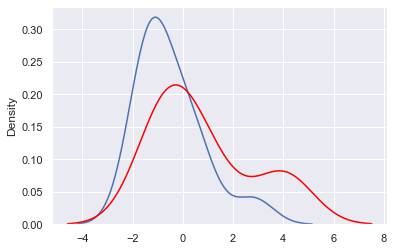

In [23]:
# Example of the Kruskal-Wallis H Test
from scipy.stats import kruskal
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869,-1,-1,-1]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169,4,4,4]
stat, p = kruskal(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

sns.kdeplot(data1)
sns.kdeplot(data2,color='red')
plt.show()   

In [24]:
# Example of the Wilcoxon Signed-Rank Test
from scipy.stats import wilcoxon
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = wilcoxon(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=21.000, p=0.557
Probably the same distribution


In [25]:
# Example of the Friedman Test
from scipy.stats import friedmanchisquare
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
data3 = [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204]
stat, p = friedmanchisquare(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=0.800, p=0.670
Probably the same distribution


In [26]:
df = pd.read_csv('heart.csv')
df['Sex1'] = df.sex.replace({1: "Male", 0: "Female"})
dx = df[["target", "Sex1"]].dropna()
pd.crosstab(dx.target, dx.Sex1)




Sex1,Female,Male
target,,
0,86,413
1,226,300


In [27]:
p_fm = 25/(72+25)                     # female population proportion with heart disease.
n = 72+25                             #size of the female populatiomn
se_female = np.sqrt(p_fm * (1 - p_fm) / n)       #standard error 
z_score = 1.96                                   # z score for 95% confident interval
lcb = p_fm - z_score* se_female       #lower limit of the CI
ucb = p_fm + z_score* se_female       #upper limit of the CI
print('Lower limit confident interval:',lcb)
print('Upper limit confident interval:',ucb)
import statsmodels.api as sm          #with stats model
print(sm.stats.proportion_confint(n * p_fm, n))

Lower limit confident interval: 0.17068878406861235
Upper limit confident interval: 0.3447751334571608
(0.17069038350737342, 0.3447735340183997)


In [28]:
se_male=0.034
se_diff = np.sqrt(se_female**2 + se_male**2)

d = 0.55 - 0.26  #The male population proportion with heart disease is 0.55 and female is 0.26
z_score = 1.96
lcb = d - z_score * se_diff  #lower limit of the CI
ucb = d + z_score* se_diff  #upper limit of the CI
print('Lower limit confident interval:',lcb)
print('Upper limit confident interval:',ucb)


Lower limit confident interval: 0.18037607988738072
Upper limit confident interval: 0.3996239201126194


In [29]:
 # generate an independent variable 
 x = np.linspace(-10, 30, 100)
 # generate a normally distributed residual
 e = np.random.normal(10, 5, 100)
 # generate ground truth
 y = 10 + 4*x + e
 df = pd.DataFrame({'x':x, 'y':y})
 df.head() 

,x,y
0,-10.000000,-20.423714
1,-9.595960,-26.559443
2,-9.191919,-17.950011
3,-8.787879,-26.688599
4,-8.383838,-9.890875


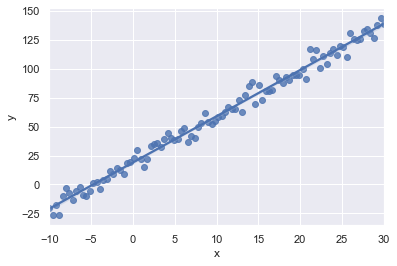

In [30]:
 sns.regplot(x='x', y='y', data = df)
 plt.show() 

In [32]:
 import numpy as np
 import pandas as pd
 from matplotlib import pyplot as plt
 import seaborn as sns
 from statsmodels import api
 from scipy import stats
 from scipy.optimize import minimize 

In [33]:
 features = api.add_constant(df.x)
 model = api.OLS(y, features).fit()
 model.summary()

C:\Users\56945\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     7605.
Date:                Fri, 10 Sep 2021   Prob (F-statistic):           1.08e-94
Time:                        10:17:08   Log-Likelihood:                -308.47
No. Observations:                 100   AIC:                             620.9
Df Residuals:                      98   BIC:                             626.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.0073      0.704     27.005      0.000      17.611      20.404
x              3.9952      0.046     87.205      0.000       3.904       4.086
==============================================================================
Omnibus:                        0.489   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.783   Jarque-Bera (JB):                0.599
Skew:                           0.153   Prob(JB):                        0.741
Kurtosis:                       2.777   Cond. No.                         20.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
 res = model.resid
 standard_dev = np.std(res)
 standard_dev 

5.289562802122958

In [38]:
# MLE function
# ml modeling and neg LL calculation
def MLE_Norm(parameters):
    # extract parameters
    const, beta, std_dev = parameters
    # predict the output
    pred = const + beta*x
    # Calculate the log-likelihood for normal distribution
    LL = np.sum(stats.norm.logpdf(y, pred, std_dev))
    # Calculate the negative log-likelihood
    neg_LL = -1*LL
    return neg_LL 

 # minimize arguments: function, intial_guess_of_parameters, method
mle_model = minimize(MLE_Norm, np.array([2,2,2]), method='L-BFGS-B')
mle_model


      fun: 308.46741295595257
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-2.27373657e-05, -2.55795386e-04,  2.27373677e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 220
      nit: 34
     njev: 55
   status: 0
  success: True
        x: array([19.0073068 ,  3.99519348,  5.28956606])